In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math

In [2]:
df = pd.read_csv('data/case_dataset.csv')
games_df = pd.read_csv('data/dictionary_games_category.csv')

# Чистим сет от юзеров без игр
players_df = df[~df['games'].apply(lambda x: x == '{}')]

In [3]:
res = df[df.age < 90].age.value_counts().to_dict()

most_popular_ages = sorted(res.items(), key=lambda x: x[1], reverse=True)[:30]
extra_ages = range(120, 90, -1)


for (age, _), old_age in zip(most_popular_ages, extra_ages):
    df.loc[df.age == old_age, 'age'] = age

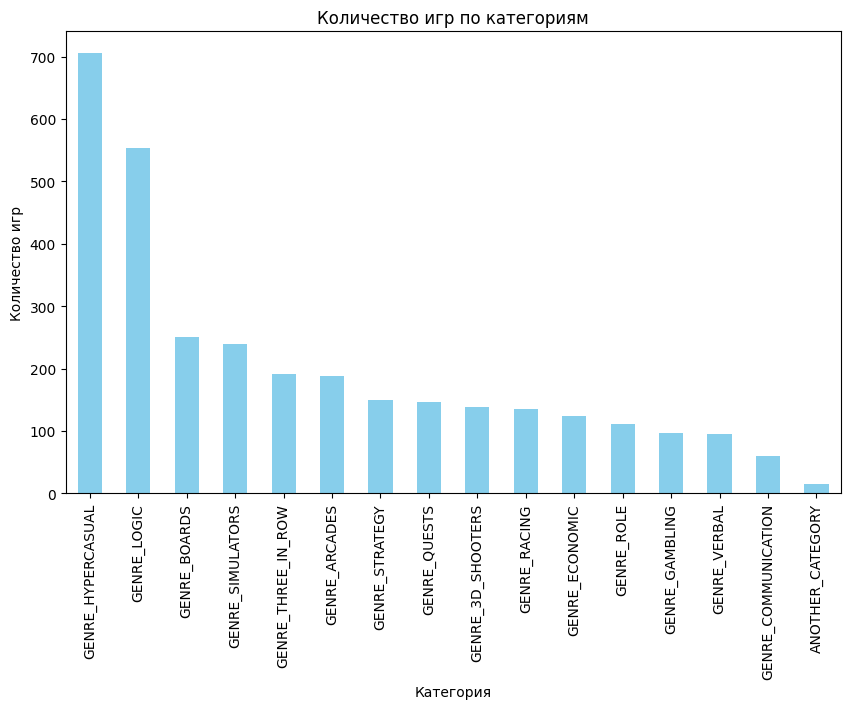

In [4]:
categories = games_df.game_category.value_counts()

plt.figure(figsize=(10, 6))
categories.plot(kind='bar', color='skyblue')
plt.title('Количество игр по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество игр')
plt.show()

In [22]:
games_strings = players_df.games.to_dict()

games_starts = {}

for user_id, games in games_strings.items():
    for game in games.split(',')[1:-1]:
        game_id, cnt_starts = list(map(int, game.split(':')))
        if game_id not in games_starts:
            games_starts[game_id] = cnt_starts
        else:
            games_starts[game_id] += cnt_starts

categories_starts  = {category:0 for category in categories.keys().tolist()}

categories_dct = games_df.set_index('game_id')['game_category'].to_dict()

for game_id, cnt_starts in games_starts.items():
    if game_id in categories_dct:
        categories_starts[categories_dct[game_id]] += cnt_starts

categories_starts.items()

dict_items([('GENRE_HYPERCASUAL', 8486), ('GENRE_LOGIC', 14028), ('GENRE_BOARDS', 19724), ('GENRE_SIMULATORS', 6505), ('GENRE_THREE_IN_ROW', 26364), ('GENRE_ARCADES', 1574), ('GENRE_STRATEGY', 3414), ('GENRE_QUESTS', 6928), ('GENRE_3D_SHOOTERS', 1703), ('GENRE_RACING', 1588), ('GENRE_ECONOMIC', 16410), ('GENRE_ROLE', 3209), ('GENRE_GAMBLING', 11500), ('GENRE_VERBAL', 3867), ('GENRE_COMMUNICATION', 8301), ('ANOTHER_CATEGORY', 0)])

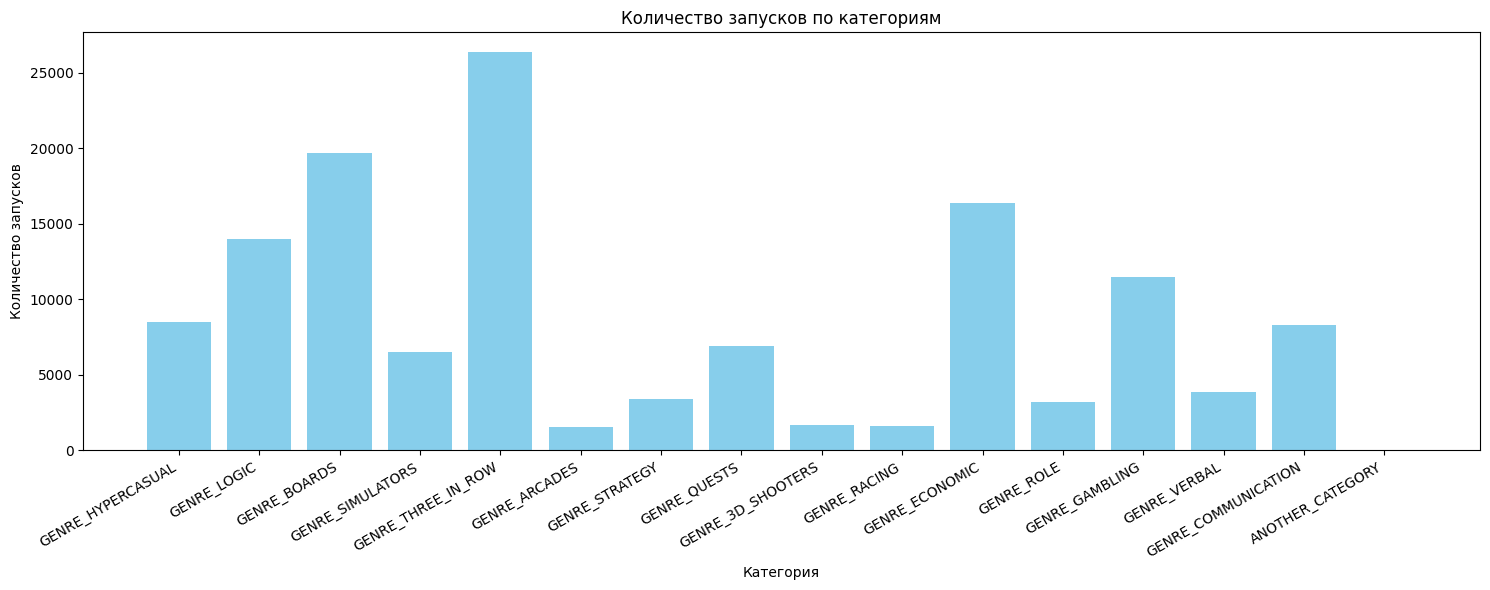

In [26]:
x = list(categories_starts.keys())
y = list(categories_starts.values())

plt.figure(figsize=(15, 6))
plt.bar(x, y, color='skyblue')
plt.title('Количество запусков по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество запусков')
plt.xticks(ha='right', rotation=30)
plt.tight_layout()

plt.show()

In [ ]:
categories_time = {category:0 for category in categories.keys().tolist()}
games_starts = {}

for user_id, games in games_strings.items():
    all_starts = 0
    user_stat = []
    for game in games.split(',')[1:-1]:
        game_id, cnt_starts = list(map(int, game.split(':')))
        user_stat.append((game_id, cnt_starts))
    all_starts = sum(user[1] for user in all_starts)
    total_time = players_df.avg_daily_ts_games.loc(user_id)

categories_dct = games_df.set_index('game_id')['game_category'].to_dict()

for game_id, cnt_starts in games_starts.items():
    if game_id in categories_dct:
        categories_starts[categories_dct[game_id]] += cnt_starts

categories_starts.items()

In [42]:
players_df

,Unnamed: 0,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,avg_daily_ts,days_in_feed,...,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,games,final_cluster,interest_array
56,59,1,35,1,117,android,['android'],25,6405.643200,24,...,17,32.703529,17,3232.150588,0.0,2.877170,5.781640,"{89297753:17,149184946:8}",16,"['Непрофессиональный юмор','Неоригинальный тем..."
119,129,1,18,2,148,iphone,"['web2', 'mvk', 'iphone', 'android']",30,4001.272000,30,...,13,41.914615,0,NaN,0.0,0.003323,4.804941,{1195731383:1},24,"['Неоригинальный тематический контент','Сообще..."
134,144,1,22,1,117,android,"['web2', 'mvk', 'android', 'android_messenger']",29,2008.208276,28,...,28,781.884643,1,658.050000,0.0,0.000000,75.071399,{51882825:1},22,"['Реклама','Бизнес','Юмор','Оригинальный конте..."
164,177,1,18,1,117,android,"['web2', 'android', 'smart_tv', 'vk_video_andr...",30,2077.347000,30,...,30,806.716000,1,8.610000,0.0,0.000000,11.376504,{1194955386:1},23,"['Неоригинальный тематический контент','Сообще..."
299,320,160,19,2,0,web2,['web2'],27,2.414444,26,...,0,NaN,0,NaN,0.0,0.000000,0.000000,{72328031:27},0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020759,1084388,1,28,1,9986,iphone,"['iphone', 'iphone_clips', 'web2', 'mvk']",30,14232.535000,30,...,30,4923.157000,2,107.010000,0.0,0.418572,143.634788,{188422601:2},18,"['Сообщество про конкретный регион','Услуги','..."
1020767,1084396,1,100,1,415,iphone,"['web2', 'mvk', 'iphone']",30,2875.863000,30,...,29,376.167931,1,31.980000,0.0,0.000000,6.949103,{1182938047:1},14,"['Домашние животные','Неоригинальный тематичес..."
1020838,1084472,1,39,1,74,android,"['mvk', 'android']",30,4608.154000,30,...,21,208.162857,12,607.620000,0.0,2.217123,37.561102,{104046779:12},16,"['Услуги','Сообщество про конкретный регион','..."
1020865,1084500,1,22,2,0,iphone,"['mvk', 'iphone']",8,2485.061250,8,...,6,30.135000,2,429.885000,0.0,0.007755,0.007755,{1186431264:1},9,[]
